<a href="https://colab.research.google.com/github/xavoliva6/dpfl_pytorch/blob/main/experiments/exp_FedMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiments on FedMNIST

**Colab Support**<br/>
Only run the following lines if you want to run the code on Google Colab

In [1]:
# Enable access to files stored in Google Drive
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [1]:
% cd /content/gdrive/My Drive/OPT4ML/src

/content/gdrive/My Drive/OPT4ML/src


# Main

In [11]:
# Install necessary requirements
!pip install -r ../requirements.txt

In [47]:
# Make sure cuda support is available
import torch

if torch.cuda.is_available():
    device_name = "cuda:0"
else:
    device_name = "cpu"
print("device_name: {}".format(device_name))
device = torch.device(device_name)

device_name: cuda:0


In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import sys
import warnings

warnings.filterwarnings("ignore")

from server import Server
from utils import plot_exp

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.dpi'] = 100

### First experiment : impact of federated learning

In [65]:
LR = 0.01
EPOCHS = 1
NR_TRAINING_ROUNDS = 30
BATCH_SIZE = 128

RANGE_NR_CLIENTS = [1,5,10]

In [66]:
experiment_losses, experiment_accs = [], []
for nr_clients in RANGE_NR_CLIENTS:
    print(f"### Number of clients : {nr_clients} ###\n\n")
    server = Server(
        nr_clients=nr_clients,
        nr_training_rounds=NR_TRAINING_ROUNDS,
        data='MNIST',
        epochs=EPOCHS,
        lr=LR,
        batch_size=BATCH_SIZE,
        is_private=False,
        epsilon=None,
        max_grad_norm=None,
        noise_multiplier=None,
        is_parallel=True,
        device=device,
        verbose='server')

    test_losses, test_accs = server.train()
    
    experiment_losses.append(test_losses)
    experiment_accs.append(test_accs)

### Number of clients : 1 ###


--- Configuration ---
nr_clients: 1
nr_training_rounds: 30
data: MNIST
epochs: 1
lr: 0.01
batch_size: 128
is_private: False
epsilon: None
max_grad_norm: None
noise_multiplier: None
is_parallel: True
device: <class 'torch.device'>
verbose: server
--- Training ---
Round 1, test_loss: 20.503, test_acc: 0.923
Round 2, test_loss: 15.046, test_acc: 0.945
Round 3, test_loss: 11.846, test_acc: 0.956
Round 4, test_loss: 10.470, test_acc: 0.959
Round 5, test_loss: 9.710, test_acc: 0.965
Round 6, test_loss: 7.948, test_acc: 0.970
Round 7, test_loss: 7.492, test_acc: 0.971
Round 8, test_loss: 7.151, test_acc: 0.973
Round 9, test_loss: 6.112, test_acc: 0.975
Round 10, test_loss: 5.819, test_acc: 0.977
Round 11, test_loss: 5.611, test_acc: 0.980
Round 12, test_loss: 4.716, test_acc: 0.981
Round 13, test_loss: 4.531, test_acc: 0.982
Round 14, test_loss: 4.223, test_acc: 0.982
Round 15, test_loss: 4.382, test_acc: 0.982
Round 16, test_loss: 3.798, test_acc: 0.985
Round 

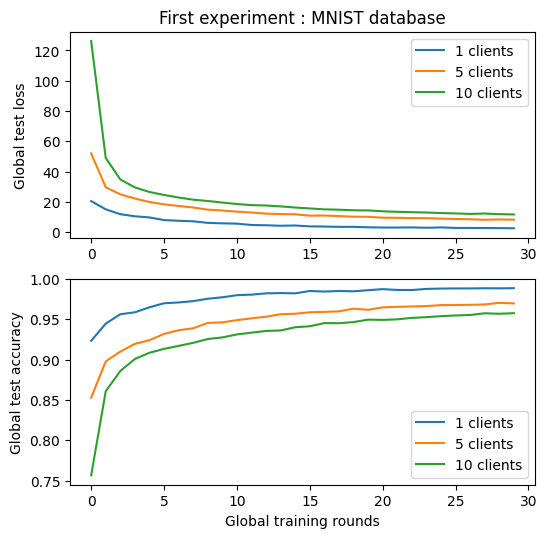

In [67]:
names = [f'{i} clients' for i in RANGE_NR_CLIENTS]
title = 'First experiment : MNIST database'
fig = plot_exp(experiment_losses, experiment_accs, names, title)
fig.savefig("MNIST_exp1.pdf")

### Second experiment : impact of differential privacy

In [60]:
NR_CLIENTS = 10
NR_TRAINING_ROUNDS = 30
EPOCHS = 1
LR = 0.01
BATCH_SIZE = 128

MAX_GRAD_NORM = 1.2
NOISE_MULTIPLIER = None

RANGE_EPSILON = [10,50,100]

In [61]:
experiment_losses, experiment_accs = [], []
for epsilon in RANGE_EPSILON:
    print(f"### ε : {epsilon} ###\n\n")
    server = Server(
        nr_clients=NR_CLIENTS,
        nr_training_rounds=NR_TRAINING_ROUNDS,
        data='MNIST',
        epochs=EPOCHS,
        lr=LR,
        batch_size=BATCH_SIZE,
        is_private=True,
        epsilon=epsilon,
        max_grad_norm=MAX_GRAD_NORM,
        noise_multiplier=NOISE_MULTIPLIER,
        is_parallel=True,
        device=device,
        verbose='server')

    test_losses, test_accs = server.train()
    experiment_losses.append(test_losses)
    experiment_accs.append(test_accs)

### ε : 10 ###


--- Configuration ---
nr_clients: 10
nr_training_rounds: 30
data: MNIST
epochs: 1
lr: 0.01
batch_size: 128
is_private: True
epsilon: 10
max_grad_norm: 1.2
noise_multiplier: None
is_parallel: True
device: <class 'torch.device'>
verbose: server
--- Training ---
Round 1, test_loss: 180.061, test_acc: 0.177
Round 2, test_loss: 177.789, test_acc: 0.281
Round 3, test_loss: 175.240, test_acc: 0.392
Round 4, test_loss: 172.313, test_acc: 0.493
Round 5, test_loss: 169.102, test_acc: 0.559
Round 6, test_loss: 165.549, test_acc: 0.599
Round 7, test_loss: 161.525, test_acc: 0.630
Round 8, test_loss: 157.084, test_acc: 0.641
Round 9, test_loss: 152.172, test_acc: 0.655
Round 10, test_loss: 147.078, test_acc: 0.658
Round 11, test_loss: 141.704, test_acc: 0.669
Round 12, test_loss: 135.671, test_acc: 0.677
Round 13, test_loss: 129.795, test_acc: 0.680
Round 14, test_loss: 123.516, test_acc: 0.691
Round 15, test_loss: 117.565, test_acc: 0.693
Round 16, test_loss: 111.511, test_acc: 0.

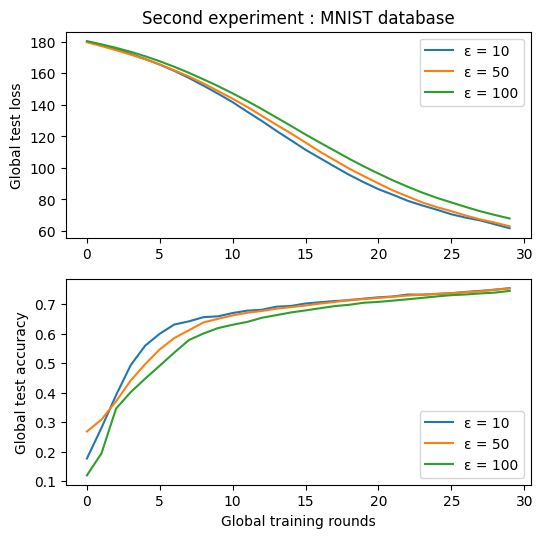

In [64]:
names = [f'ε = {i}' for i in RANGE_EPSILON]
title = 'Second experiment : MNIST database'
fig = plot_exp(experiment_losses, experiment_accs, names, title)
plt.savefig('MNIST_exp2.pdf')